## Overview

In this article we will be building an application that will detect the faces in the images and this time we will be building the application using **mediapipe** library. Along with face detection we will also be detecting the significiant points of the faces here i.e. **Eye, Nose, Mouth and Ear**. It will be fun to know various methods to perform one problem statement and detecting faces from mediapipe is just another way to approach a problem statement. 

## Application of face detection

1. Face recoginition: Face detection is just one step before the face recognition because before recognizing the face we have to first detect it.
2. Face emotions detection: Face emotions recognition is also one of the widely applied use case of face detection.
3. Lock screen: So whenever we use the lock screen functionality of android/apple phones then that application first detect or recognize our face in that area face detection is the first step to be followed.

###  Import the Libraries

The very first step will be to import all the necessary libraries.

In [1]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

## Face Detection

So this time we will be performing the face detection functionality with **mediapipe's face detection model** when we try to get into the depth of this model we can find out that it is completely based on **BlazeFace** which is one of the face detection algorithm and the main reason that it is used is because of its lightweight and very accurate predictions when it comes to face detection even that algorithm is derieved from the **MobileNetV1/V2** state of the art model.
The **frame per second** of this model is **200-1000** depending on the specification of devices.

### Our next step is to initialize the face detection model of mediapipe library

Before using the **mediapipe's face detection model** we have to first initialize the model for that we will be using the simple syntax as: **mp.solution.face_detection** and after initializing the model we will call the **FaceDetection** function with some arguments. Now we will discuss about those arguments:

* **`model_selection`**: This argument takes the **real integer** value only in the range of **0-1** i.e. this model will take the integer value as either 1 or 0. Let us discuss these two type of model.
    1. **0 type model**: When we will select the 0 type model then our face detection model will be able to detect the faces within the range of **2 meters** from the camera.
    2. **1 type model**: When we will select the 1 type model then our face detection model will be able to detect the faces within the range of **5 meters**. Though the **default value** is **0**.
    
    
* **`min_detection_confidence`**: This argument also takes the integer value but in the range of **[0.0,1.0]** and the default value for the sasme is **0.5** which is 50% confidence i.e. when our model will be detecting the faces it should be atleast 50% sure that the face is there otherwise it won't detect anything.


Though we have initialize our model and it is ready to detect the faces but having said that we need to visualize the results too for that we will use the **`drawing_utils`** function to see the result in the images/frames.

In [2]:
mp_face_detection = mp.solutions.face_detection

face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

Code breakdown

1. The very first step will be to initialise the mediapipe's face detection model.
2. After initilizating the model we will call the **FaceDetection** function by using the relevant parameters and its values.
3. At the last it is also necessary to see the results for that we will use the **drawing_utils** function to draw the results on the image/frames. 

### Reading the image on which we will perform the face detection

So after the initialization part we will read a particular image on which we will apply our face detection model for that we will be using the **`cv2.imread`** function that will help us to read the image but during this step it will convert the image format from **RGB** to **BGR**.

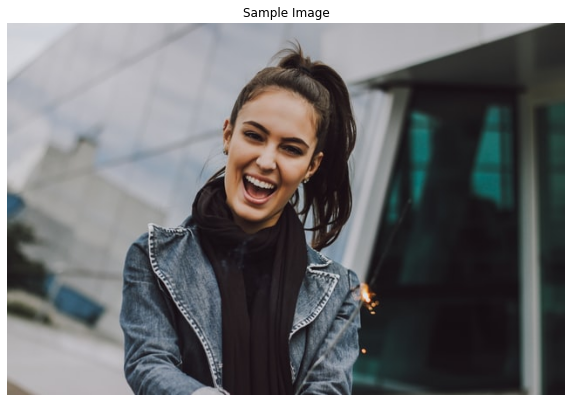

In [3]:
sample_img = cv2.imread('media/sample.jpg')

plt.figure(figsize = [10, 10])

plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

Code breakdown

1. As discussed here we have read the image after providing it's path in the function.
2. Now, we will use the **matplotlib** function to plot the image as I'm working with jupyter notebook so cv2's imshow function will not work in this environtment hence with matplotlib's `show` function we will plot the image before that we will also se the figure size with the help of `figure` function of matplotlib. 

## Performing the face detection using process function

So we have read the image as well now comes to main task where we will use our face detection model and implement its functionality on our sample image for that we will be using the **`process()`** function from **`FaceDetection`** class. Basically this function will return us the major six coordinate for every face it will detect in the image/frame.
Those six coordinates are as follows:

1. **Right Eye**
2. **Left Eye**
3. **Nose Tip**
4. **Mouth Center** 
5. **Right Ear Tragion** 
6. **Left Ear Tragion**

So after getting these 6 points we will be able to plot the bounding box on the image/frame but we will only plot two major key points so that the output is clear and there should be no extra points over the image which could make it conjusted.

In [4]:
face_detection_results = face_detection.process(sample_img[:,:,::-1])

if face_detection_results.detections:
    
    for face_no, face in enumerate(face_detection_results.detections):
        
        print(f'FACE NUMBER: {face_no+1}')
        print('==============================')
        
        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')
        
        face_data = face.location_data

        print(f'\nFACE BOUNDING BOX:\n{face_data.relative_bounding_box}')
        
        for i in range(2):

            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}') 

FACE NUMBER: 1
FACE CONFIDENCE: 0.98

FACE BOUNDING BOX:
xmin: 0.39702365
ymin: 0.27627468
width: 0.16100731
height: 0.24132276

RIGHT_EYE:
x: 0.436854
y: 0.3198586

LEFT_EYE:
x: 0.51124376
y: 0.35651308



Code breakdown

1. Firstly we will change the format of the image from the BGR format to it's RGB version.
2. Then, using the if condition we will firstly detect that whether the face is found in the image or not for that we will be using the `detection` attribute of **face_detection**.
3. Then with the help of `enumerate` function and for loop we will iterate over the faces found in the image.
4. Now we will print out the **total number** of faces found in the image.
5. We will also print out the confidence value i.e. how much our model is confident that the face is detected or not.
6. Then we will get the bounding box and major points which we will be displaying on the image.
7. Now note one thing in the inner for loop we are just iterating over 2 points because we only want to see the two points on the image from those major 6 points and then finally we will display those points - the normalised version of the coordinates.

## Visualizing the results

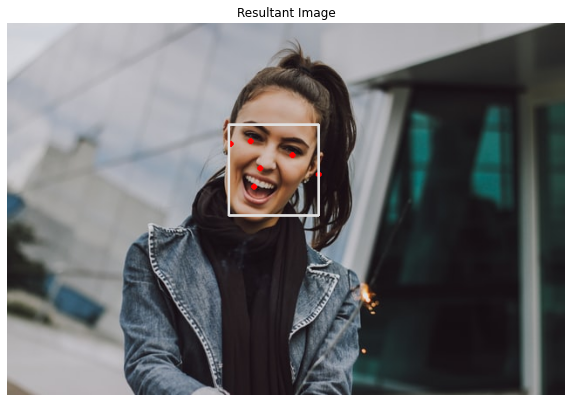

In [5]:
img_copy = sample_img[:,:,::-1].copy()

if face_detection_results.detections:
    
    for face_no, face in enumerate(face_detection_results.detections):

        mp_drawing.draw_detection(image=img_copy, detection=face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))
fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

Code breakdown

1. First we will create the copy of the image using `copy` method so that we won't loose the original preprocessed part of image.
2. Then again we will first check if the faces are found or not then only we will proceed further.
3. If the faces were found then we will iterate over each face via for loop and enumerate function.
4. Now instead of printing the points we will draw the points on the sample image using the **`draw_detection`** function with relevant parameters as discussed.
5. Now we will set the size of the figure (here image) using matplotlib's figure function.
6. Finally, we will display the image with the bounding box and the points as well. 

## Conclusion

So here I conclude my article on Face detection using mediapipe library though along with that its good to have a knowledge of other algorithms or the models which are capable to detect the faces because in the computer vision community there are variety of models/algorithm available and one of them is via haar cascade classifiers we can detect the faces and other objects.